In [1]:
!ls

LSTM.ipynb                 scraping.ipynb
__pycache__                transformer_modeling.ipynb
dataset.py                 tsn
news.csv                   ukr-news.csv
requirements.txt           unian
results                    venv


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datasets import list_datasets, load_dataset
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow

/Users/andriy/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-12-16 13:15:29.851954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# df = pd.read_csv('ukr-news.csv')
df = load_dataset('AndriyBilinskiy/ukr-news', split='train').to_pandas()

In [ ]:
df = df[df['category'].isin(['economic', 'health', 'polit', 'science', 'war'])]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

model_checkpoint = ModelCheckpoint("model.h5", save_best_only=True, monitor='val_accuracy', mode='max')


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
total_words = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(df['text'])

padded_sequences = pad_sequences(sequences, maxlen=50, padding='post')

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['category'])

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

embedding_vector_features = 100
model = Sequential()
model.add(Embedding(total_words, embedding_vector_features, input_length=50))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, batch_size=64, callbacks=[model_checkpoint])


In [38]:
!ls

Kmeans.ipynb               results
LSTM.ipynb                 scraping.ipynb
__pycache__                transformer_modeling.ipynb
dataset.py                 tsn
model_checkpoint.h5        ukr-news.csv
news.csv                   unian
requirements.txt           venv


In [39]:
from tensorflow.keras.models import load_model

model_path_to_load = "model_checkpoint.h5"
loaded_model = load_model(model_path_to_load)

In [40]:
loaded_model

In [42]:
X_test

array([[  6460,  43398,    796, ..., 322932,   1777,     21],
       [  9351,   2623,  10609, ...,   1496,   5507,     82],
       [   645,     13,      2, ...,  87491,  16044,   4844],
       ...,
       [  2579,   2229,  10912, ...,   6424,      2,    827],
       [289108,   6117,   8628, ...,  39791,      1,    769],
       [261060,      1,  71230, ...,     56,   2227,   2498]], dtype=int32)

In [52]:
predicted_labels = np.load("LSTM_predict.npy")

In [44]:
y_test

array([4, 2, 0, ..., 3, 3, 0])

In [55]:
categories = ["is__economic","is__health","is__polit","is__science","is__war"]

In [56]:
predicted_labels = [categories[i] for i in predicted_labels]
y_test = [categories[i] for i in y_test]

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predicted_labels)
accuracy

0.8043184885290149

In [64]:
print(classification_report(y_test, predicted_labels))
accuracy

              precision    recall  f1-score   support

is__economic       0.93      0.87      0.90       728
  is__health       0.64      0.78      0.70       748
   is__polit       0.94      0.89      0.91       805
 is__science       0.79      0.68      0.73       655
     is__war       0.76      0.79      0.77       769

    accuracy                           0.80      3705
   macro avg       0.81      0.80      0.80      3705
weighted avg       0.81      0.80      0.81      3705



0.8043184885290149

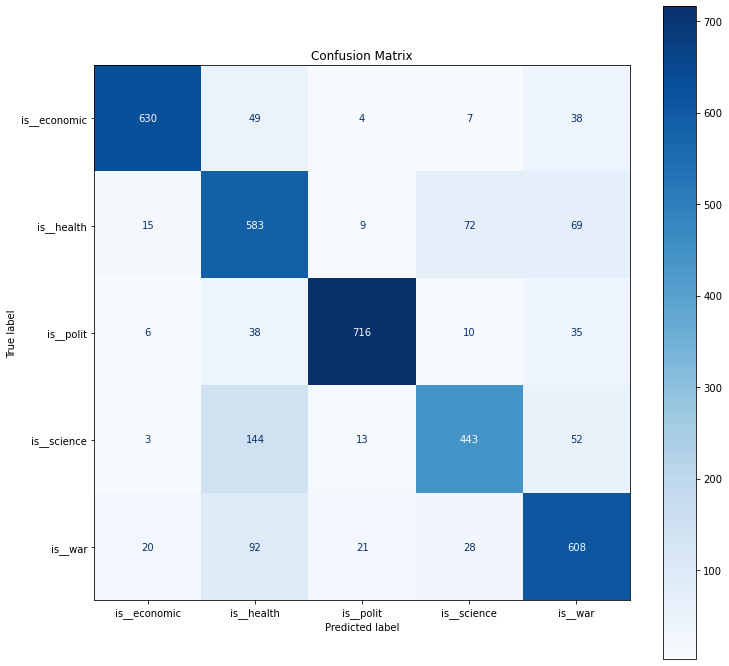

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tabulate import tabulate


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
fig, ax = plt.subplots(figsize=(12, 12))
# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format=".0f", ax=ax)
plt.title('Confusion Matrix')
plt.show()
